In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [3]:
data = pd.read_csv('../../Dataset/body_level_classification_train.csv')

data.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [4]:
# checking for null values
data.isnull().values.any()

False

In [5]:
# getting unique values in non-numeric columns
print(data.Gender.unique())
print(data.H_Cal_Consump.unique())
print(data.Alcohol_Consump.unique())
print(data.Smoking.unique())
print(data.Food_Between_Meals.unique())
print(data.Fam_Hist.unique())
print(data.H_Cal_Burn.unique())
print(data.Transport.unique())
print(data.Body_Level.unique())


['Female' 'Male']
['yes' 'no']
['no' 'Sometimes' 'Frequently' 'Always']
['no' 'yes']
['Frequently' 'Sometimes' 'no' 'Always']
['yes' 'no']
['no' 'yes']
['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']
['Body Level 1' 'Body Level 2' 'Body Level 3' 'Body Level 4']


(array([190.,   0.,   0., 201.,   0.,   0., 406.,   0.,   0., 680.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

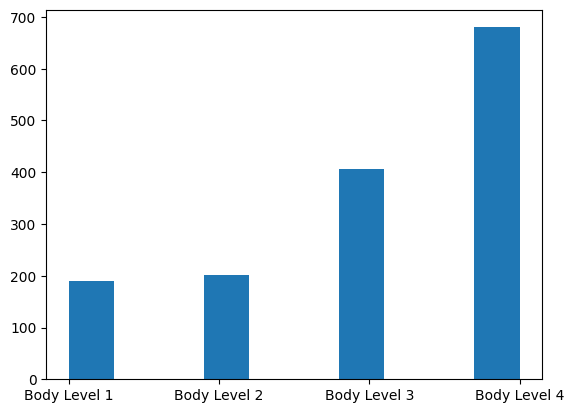

In [6]:
# insights on classes frequencies 
plt.hist(data.Body_Level)

In [7]:
data.describe()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,24.290420,1.701602,86.542290,2.421912,2.005120,2.682104,1.023106,0.650672
std,6.323081,0.094654,26.278277,0.540711,0.620307,0.790751,0.844840,0.605199
min,15.000000,1.456346,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.895877,1.629194,65.000000,2.000000,1.549931,2.644692,0.145687,0.000000
50%,22.720449,1.701284,82.636162,2.416044,2.000000,3.000000,1.000000,0.616045
75%,26.000000,1.770278,106.690530,3.000000,2.482933,3.000000,1.672639,1.000000
max,55.246250,1.980000,173.000000,3.000000,3.000000,4.000000,3.000000,2.000000


In [8]:
# encoding categorical values
data_encoded = data.copy()
data_encoded['Gender'] = pd.factorize(data_encoded.Gender)[0]
data_encoded['H_Cal_Consump'] = pd.factorize(data_encoded.H_Cal_Consump)[0]
data_encoded['Alcohol_Consump'] = pd.factorize(data_encoded.Alcohol_Consump)[0]
data_encoded['Smoking'] = pd.factorize(data_encoded.Smoking)[0] 
data_encoded['Food_Between_Meals'] = pd.factorize(data_encoded.Food_Between_Meals)[0] 
data_encoded['Fam_Hist'] = pd.factorize(data_encoded.Fam_Hist)[0] 
data_encoded['H_Cal_Burn'] = pd.factorize(data_encoded.H_Cal_Burn)[0] 
data_encoded['Transport'] = pd.factorize(data_encoded.Transport)[0] 
data_encoded['Body_Level'] = pd.factorize(data_encoded.Body_Level)[0] 

data_encoded.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,0,22.547298,1.722461,51.881263,0,2.663421,1.041110,0,0,3.000000,0,0,0,0.794402,1.391948,0,0
1,1,19.799054,1.743702,54.927529,0,2.000000,2.847264,1,0,3.289260,1,0,0,1.680844,2.000000,0,0
2,0,17.823438,1.708406,50.000000,0,1.642241,1.099231,1,0,3.452590,1,1,0,0.418875,1.000000,0,0
3,0,19.007177,1.690727,49.895716,0,1.212908,1.029703,1,0,3.207071,1,1,0,2.000000,1.000000,0,0
4,1,19.729250,1.793315,58.195150,0,2.508835,2.076933,0,0,3.435905,1,0,0,2.026668,1.443328,1,0


In [9]:
def X_y_split(data):
    df_numpy = data.to_numpy()
    features = df_numpy[:, :-1]
    labels = df_numpy[:, -1]
    return features, labels

X_train, y_train = X_y_split(data_encoded)
X_train, y_train

(array([[0.0000000e+00, 2.2547298e+01, 1.7224610e+00, ..., 7.9440200e-01,
         1.3919480e+00, 0.0000000e+00],
        [1.0000000e+00, 1.9799054e+01, 1.7437020e+00, ..., 1.6808440e+00,
         2.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.7823438e+01, 1.7084060e+00, ..., 4.1887500e-01,
         1.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 2.6000000e+01, 1.6291910e+00, ..., 0.0000000e+00,
         5.5546800e-01, 0.0000000e+00],
        [0.0000000e+00, 2.5982261e+01, 1.6292250e+00, ..., 1.6820000e-02,
         5.8284000e-01, 0.0000000e+00],
        [1.0000000e+00, 2.3000000e+01, 1.7746440e+00, ..., 6.1446600e-01,
         5.7954100e-01, 0.0000000e+00]]),
 array([0., 0., 0., ..., 3., 3., 3.]))